In [1]:
# Import standard libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
import os

# Import custom modules
from evaluators.evaluator import Evaluator

# Evaluation Parameters
checkpoint_path = 'checkpoints/pong_ddqn_checkpoint_924.pth'  # Path to your trained agent's checkpoint
num_episodes = 100                                          # Number of episodes for evaluation
render = False                                               # Set to True to render the environment
save_path = 'evaluation_results.json'                       # Path to save evaluation results




In [2]:
# Initialize Evaluator
evaluator = Evaluator(agent_checkpoint_path=checkpoint_path, 
                      num_episodes=num_episodes, 
                      render=render)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Loaded trained agent from checkpoints/pong_ddqn_checkpoint_924.pth


/Users/raulbloch/Downloads/Pong6/evaluators/evaluator.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location='cpu')  # Us

In [3]:
# Evaluate Trained Agent
print("Evaluating Trained Agent...")
trained_rewards, trained_steps = evaluator.evaluate_agent(render=render)

Evaluating Trained Agent...
Trained Agent - Episode 1: Reward = 8.0, Steps = 3722
Trained Agent - Episode 2: Reward = 9.0, Steps = 3326
Trained Agent - Episode 3: Reward = 15.0, Steps = 2753
Trained Agent - Episode 4: Reward = 7.0, Steps = 4486
Trained Agent - Episode 5: Reward = 6.0, Steps = 3799
Trained Agent - Episode 6: Reward = 6.0, Steps = 3547
Trained Agent - Episode 7: Reward = 8.0, Steps = 4395
Trained Agent - Episode 8: Reward = 6.0, Steps = 4584
Trained Agent - Episode 9: Reward = 10.0, Steps = 3473
Trained Agent - Episode 10: Reward = 6.0, Steps = 4220
Trained Agent - Episode 11: Reward = 7.0, Steps = 4851
Trained Agent - Episode 12: Reward = 3.0, Steps = 4264
Trained Agent - Episode 13: Reward = 1.0, Steps = 5064
Trained Agent - Episode 14: Reward = 11.0, Steps = 3383
Trained Agent - Episode 15: Reward = 14.0, Steps = 3512
Trained Agent - Episode 16: Reward = 9.0, Steps = 3871
Trained Agent - Episode 17: Reward = 14.0, Steps = 2966
Trained Agent - Episode 18: Reward = 1.0,

In [4]:
# Evaluate Random Agent
print("\nEvaluating Random Agent...")
random_rewards, random_steps = evaluator.evaluate_random_agent(render=render)


Evaluating Random Agent...
Random Agent - Episode 1: Reward = -21.0, Steps = 824
Random Agent - Episode 2: Reward = -21.0, Steps = 1190
Random Agent - Episode 3: Reward = -21.0, Steps = 1008
Random Agent - Episode 4: Reward = -21.0, Steps = 825
Random Agent - Episode 5: Reward = -21.0, Steps = 824
Random Agent - Episode 6: Reward = -21.0, Steps = 826
Random Agent - Episode 7: Reward = -20.0, Steps = 983
Random Agent - Episode 8: Reward = -21.0, Steps = 886
Random Agent - Episode 9: Reward = -21.0, Steps = 884
Random Agent - Episode 10: Reward = -21.0, Steps = 826
Random Agent - Episode 11: Reward = -20.0, Steps = 1044
Random Agent - Episode 12: Reward = -21.0, Steps = 764
Random Agent - Episode 13: Reward = -21.0, Steps = 888
Random Agent - Episode 14: Reward = -21.0, Steps = 946
Random Agent - Episode 15: Reward = -21.0, Steps = 1127
Random Agent - Episode 16: Reward = -21.0, Steps = 886
Random Agent - Episode 17: Reward = -21.0, Steps = 945
Random Agent - Episode 18: Reward = -19.0,

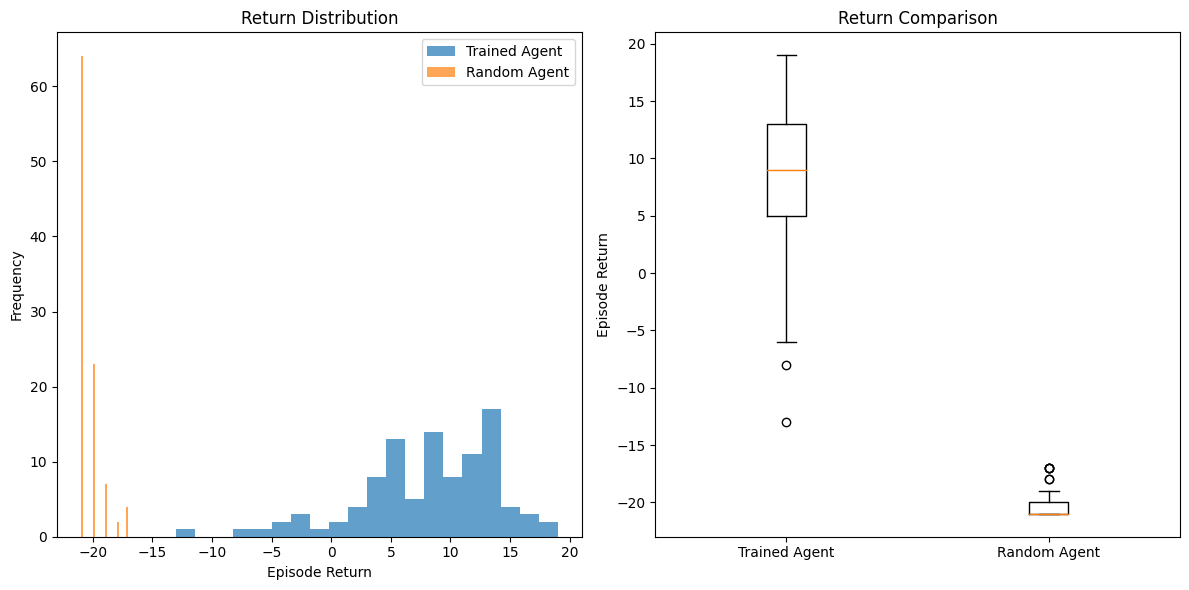

In [5]:
# Visualize Evaluation Results
evaluator.visualize_results(trained_rewards, random_rewards)

In [12]:
# Save Evaluation Results
evaluator.save_results(trained_rewards, random_rewards, save_path=save_path)

Evaluation results saved to evaluation_results.json


In [13]:
# Load and Display Saved Evaluation Results
with open(save_path, 'r') as f:
    evaluation_results = json.load(f)

# Display Summary Statistics
print("Trained Agent:")
print(f"  Average Reward: {evaluation_results['trained_agent']['average_reward']}")
print(f"  Reward Std Dev: {evaluation_results['trained_agent']['std_reward']}")

print("\nRandom Agent:")
print(f"  Average Reward: {evaluation_results['random_agent']['average_reward']}")
print(f"  Reward Std Dev: {evaluation_results['random_agent']['std_reward']}")

Trained Agent:
  Average Reward: 6.36
  Reward Std Dev: 6.731300023026755

Random Agent:
  Average Reward: -20.51
  Reward Std Dev: 0.8543418519538886


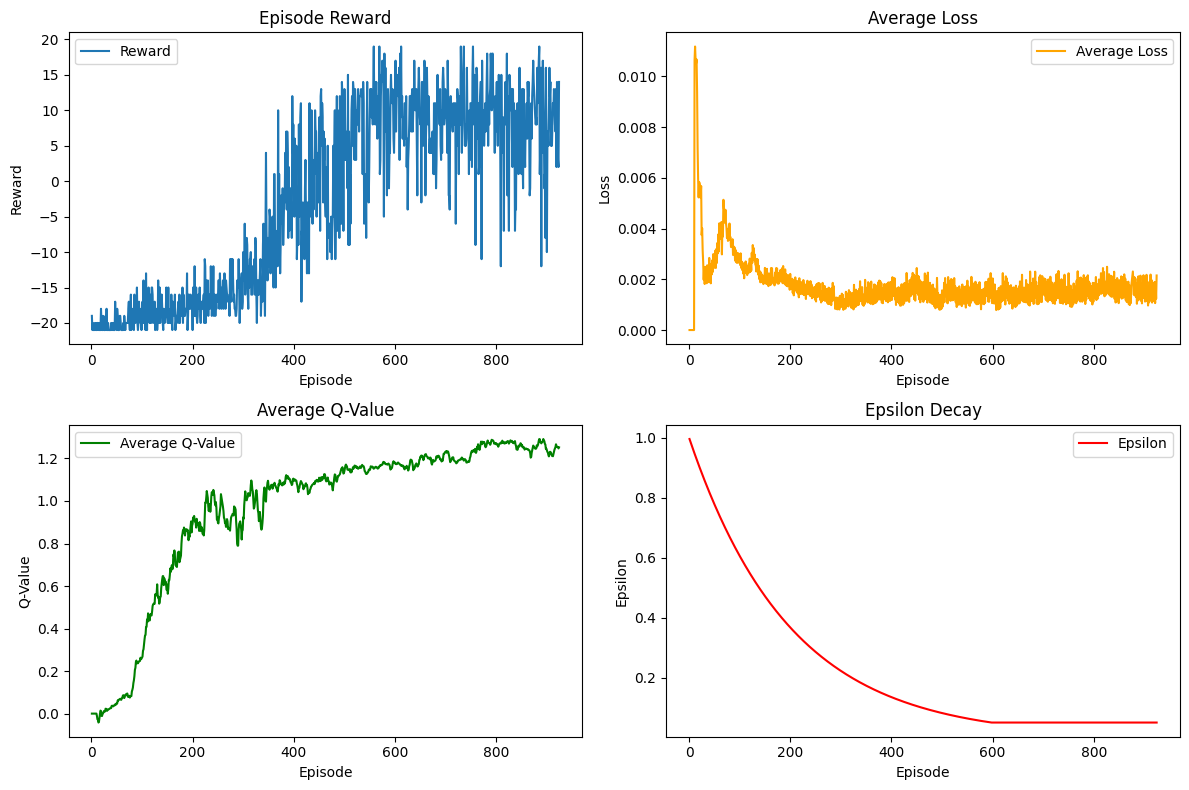

In [3]:
# Plot Training Metrics (Assuming you have training_metrics.json)
training_metrics_path = 'training_metrics.json'

if os.path.exists(training_metrics_path):
    with open(training_metrics_path, 'r') as f:
        training_metrics = json.load(f)
    
    episodes = [m['episode'] for m in training_metrics]
    rewards = [m['reward'] for m in training_metrics]
    avg_losses = [m['avg_loss'] for m in training_metrics]
    avg_q_values = [m['avg_q_value'] for m in training_metrics]
    epsilons = [m['epsilon'] for m in training_metrics]
    
    plt.figure(figsize=(12, 8))

    # Plot Reward
    plt.subplot(2, 2, 1)
    plt.plot(episodes, rewards, label='Reward')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Episode Reward')
    plt.legend()

    # Plot Average Loss
    plt.subplot(2, 2, 2)
    plt.plot(episodes, avg_losses, label='Average Loss', color='orange')
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.title('Average Loss')
    plt.legend()

    # Plot Average Q-Values
    plt.subplot(2, 2, 3)
    plt.plot(episodes, avg_q_values, label='Average Q-Value', color='green')
    plt.xlabel('Episode')
    plt.ylabel('Q-Value')
    plt.title('Average Q-Value')
    plt.legend()

    # Plot Epsilon
    plt.subplot(2, 2, 4)
    plt.plot(episodes, epsilons, label='Epsilon', color='red')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.title('Epsilon Decay')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print(f"Training metrics file '{training_metrics_path}' not found.")

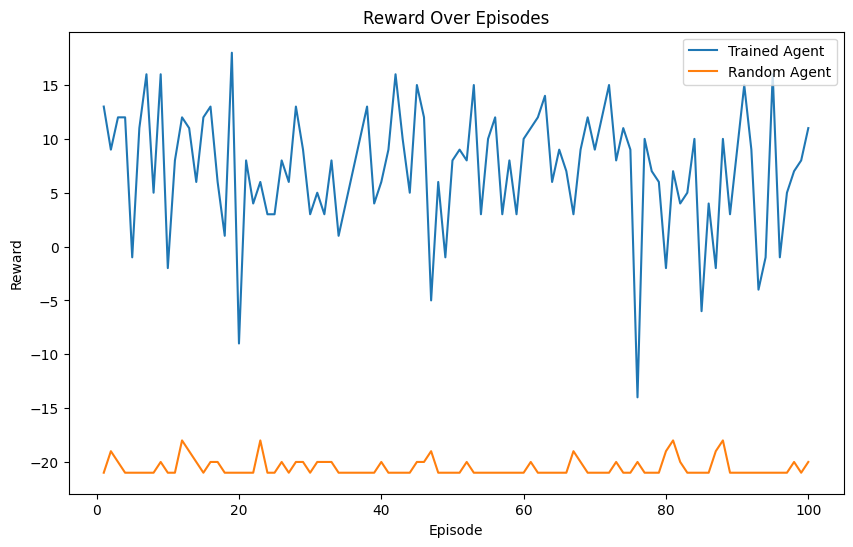

In [12]:
# Plot Cumulative Rewards Over Episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), trained_rewards, label='Trained Agent')
plt.plot(range(1, num_episodes + 1), random_rewards, label='Random Agent')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward Over Episodes')
plt.legend()
plt.show()

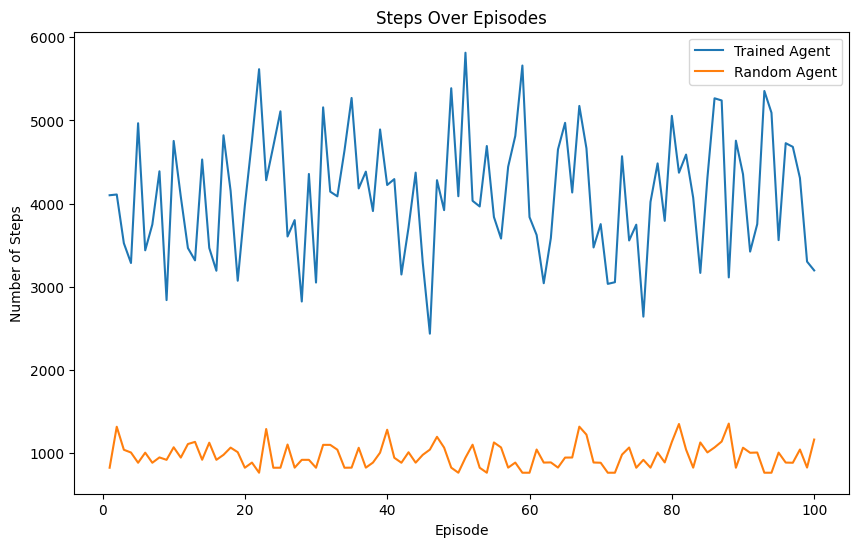

In [13]:
# Plot Steps Over Episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), trained_steps, label='Trained Agent')
plt.plot(range(1, num_episodes + 1), random_steps, label='Random Agent')
plt.xlabel('Episode')
plt.ylabel('Number of Steps')
plt.title('Steps Over Episodes')
plt.legend()
plt.show()